In [1]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [2]:
import sympy 

sympy.init_printing()

In [3]:
x = sympy.symbols('x')

In [4]:
x , nu, t = sympy.symbols('x nu t') 

In [5]:
nu

In [8]:
phi = (sympy.exp(-(x-4*t)**2/(4*nu*(t+1)))+
       sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1))))

In [9]:
phi

Use .diff() to differentiate

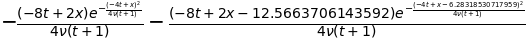

In [10]:
phiprime = phi.diff(x)
phiprime

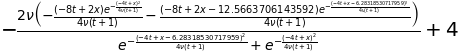

In [11]:
u = -2 * nu * phiprime/phi+4
u

In [12]:
from sympy.utilities.lambdify import lambdify

In [13]:
u_lamb = lambdify((t,nu,x),u)

In [14]:
type(u_lamb)

function

In [15]:
u_lamb(1,4,3)

In [18]:
# set parameters

nx = 101
L = 2*numpy.pi
dx= L/(nx-1)

nu = 0.8

sigma = 0.1
dt = sigma * dx**2 / nu

nt=100

In [19]:
x= numpy.linspace(0.0 , L, num=nx)

In [20]:
u0 = numpy.empty(nx)
for i in range (nx):
    u0[i] = u_lamb(0.0,nu, x[i])

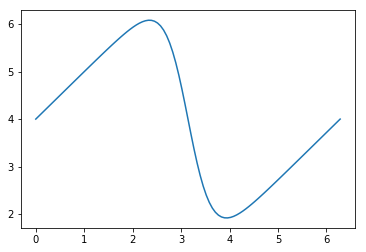

In [21]:
pyplot.plot(x,u0)

In [ ]:
u_hist = [u0.copy()]
u = u0.copy()
for n in range(nt):
    un = u.copy()
    #update all the interior points
    u[1:-1]= (un[1:-1] 
              - (un[1:-1]*dt/dx*(un[1:-1]-un[:-2]))) + (nu*dt/dx**2*(un[:-2]-2*un[1:-1]+un[2:]))
    #boundary conditions
    u[-1]=u[0]
    u[0] = (un[0] 
            - un[0] * dt/dx *(un[0] - un[-2])
            +nu*dt/dx**2*
            (un[-2] - 2 *un[0] + un[1])) 
    #record
    u_hist.append(u.copy())